<a href="https://colab.research.google.com/github/C0k3J/Proyecto-Inteligencia-Clasificaci-n-de-curvas-de-luz-de-estrellas-peri-dicas-EROS/blob/main/Proyecto_inteligencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pyarrow might be needed to read the data
!python -m pip install Cython
!python -m pip install -e git+https://git@github.com/alercebroker/turbo-fats#egg=turbofats
!python -m pip install -e git+https://git@github.com/alercebroker/mhps#egg=mhps
!python -m pip install -e git+https://git@github.com/alercebroker/P4J#egg=P4J
!python -m pip install pyarrow
!python -m pip install -e git+https://git@github.com/alercebroker/lc_classifier#egg=lc_classifier

Obtaining turbofats from git+https://****@github.com/alercebroker/turbo-fats#egg=turbofats
  Cloning https://****@github.com/alercebroker/turbo-fats to ./src/turbofats
  Running command git clone --filter=blob:none --quiet 'https://****@github.com/alercebroker/turbo-fats' /content/src/turbofats
  Resolved https://****@github.com/alercebroker/turbo-fats to commit c9b67f4087df35fe4e85c3e09e3a8e1be0e31068
  Preparing metadata (setup.py) ... done
  Running setup.py develop for turbofats
Obtaining mhps from git+https://****@github.com/alercebroker/mhps#egg=mhps
  Cloning https://****@github.com/alercebroker/mhps to ./src/mhps
  Running command git clone --filter=blob:none --quiet 'https://****@github.com/alercebroker/mhps' /content/src/mhps
  Resolved https://****@github.com/alercebroker/mhps to commit 1c827b7d19a44ecbd54d79dd2cd786ed17c4ce91
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... don

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Extraccion de caracteristicas

In [ ]:
from lc_classifier.utils import LightcurveBuilder

from lc_classifier.features import MHPSExtractor, PeriodExtractor, GPDRWExtractor
from lc_classifier.features import FoldedKimExtractor
from lc_classifier.features import HarmonicsExtractor, IQRExtractor
from lc_classifier.features import PowerRateExtractor
from lc_classifier.features import TurboFatsFeatureExtractor

from lc_classifier.features import FeatureExtractorComposer

import os
import glob

### rrl

#### RRab

In [ ]:
ruta = "/content/drive/MyDrive/Proyecto inteligencia/rrl/RRab"

archivos =  os.listdir(ruta)

# Filtrar archivos por extensión .dat y .time
archivos_time = [archivo for archivo in archivos if archivo.endswith('.time')]

lightcurves = []
for archivo in archivos_time[:2]:

  df = pd.read_csv(ruta+'/'+ archivo, comment='#', delim_whitespace=True, header=None)
  columns = ['date' ,'MagR' ,'ErMagR', 'MagB', 'ErMagB']
  df.columns = columns
  lightcurve_builder = LightcurveBuilder(archivo[:-5])
  lightcurve_builder.add_band(
        'r',
        df['date'],
        df['MagR'],
        df['ErMagR'])

  lightcurve_builder.add_band(
        'b',
        df['date'],
        df['MagB'],
        df['ErMagB'])

  lightcurve = lightcurve_builder.build_dataframe()

  bands = ['r','b']
  feature_extractor = FeatureExtractorComposer(
    [
        MHPSExtractor(bands),
        PeriodExtractor(bands,smallest_period=0.001,largest_period=0.05, optimal_grid=False, trim_lightcurve_to_n_days=None, min_length=5),
        GPDRWExtractor(bands),
        FoldedKimExtractor(bands),
        HarmonicsExtractor(bands),
        IQRExtractor(bands),
        PowerRateExtractor(bands),
        TurboFatsFeatureExtractor(bands)
    ]
  )
  features = feature_extractor.compute_features(lightcurve)
  lightcurves.append(features)

lightcurves = pd.concat(lightcurves)
lightcurves

In [ ]:
lightcurves.to_csv('rrl_RRab.csv', index=False)

#### RRc

In [ ]:
ruta = "/content/drive/MyDrive/Proyecto inteligencia/Copias rrl Jorge/RRc Copias/RRc19"

archivos =  os.listdir(ruta)

# Filtrar archivos por extensión .dat y .time
archivos_time = [archivo for archivo in archivos if archivo.endswith('.time')]

lightcurves = []
for archivo in archivos_time:

  df = pd.read_csv(ruta+'/'+ archivo, comment='#', delim_whitespace=True, header=None)
  columns = ['date' ,'MagR' ,'ErMagR', 'MagB', 'ErMagB']
  df.columns = columns
  lightcurve_builder = LightcurveBuilder(archivo[:-5])
  lightcurve_builder.add_band(
        'r',
        df['date'],
        df['MagR'],
        df['ErMagR'])

  lightcurve_builder.add_band(
        'b',
        df['date'],
        df['MagB'],
        df['ErMagB'])

  lightcurve = lightcurve_builder.build_dataframe()

  bands = ['r','b']
  feature_extractor = FeatureExtractorComposer(
    [
        MHPSExtractor(bands),
        PeriodExtractor(bands,smallest_period=0.001,largest_period=0.05, optimal_grid=False, trim_lightcurve_to_n_days=None, min_length=5),
        GPDRWExtractor(bands),
        FoldedKimExtractor(bands),
        HarmonicsExtractor(bands),
        IQRExtractor(bands),
        PowerRateExtractor(bands),
        TurboFatsFeatureExtractor(bands)
    ]
  )
  features = feature_extractor.compute_features(lightcurve)
  lightcurves.append(features)

lightcurves = pd.concat(lightcurves)
lightcurves

,MHPS_ratio_r,MHPS_low_r,MHPS_high_r,MHPS_non_zero_r,MHPS_PN_flag_r,MHPS_ratio_b,MHPS_low_b,MHPS_high_b,MHPS_non_zero_b,MHPS_PN_flag_b,...,Skew_b,SmallKurtosis_b,Std_b,StetsonK_b,Pvar_b,ExcessVar_b,SF_ML_amplitude_b,SF_ML_gamma_b,IAR_phi_b,LinearTrend_b
oid,,,,,,,,,,,,,,,,,,,,,
lm0181m23452,5.856046,2.184633,0.373056,539.0,0.0,2.880803,0.355372,0.123359,539.0,0.0,...,5.297062,26.420004,14.222992,0.760573,1.0,0.409607,15.000000,0.026230,4.119560e-01,-0.000767
lm0181k12961,6.090888,1.899645,0.311883,529.0,0.0,2.928297,0.736800,0.251614,529.0,0.0,...,3.231391,8.574623,21.146335,0.752696,1.0,0.668613,15.000000,0.029705,3.566678e-01,-0.000720
lm0180l9285,10.058842,3.559191,0.353837,437.0,0.0,1.555290,0.101370,0.065178,437.0,0.0,...,6.558125,41.670173,11.837204,0.730385,1.0,0.325158,14.651058,-0.040474,4.620413e-01,0.002197
lm0181m25855,6.904802,4.560707,0.660512,536.0,0.0,3.574156,0.400825,0.112145,536.0,0.0,...,5.276424,26.200231,14.298645,0.765082,1.0,0.418869,15.000000,0.006268,4.084575e-01,-0.001042
lm0180k15158,6.209486,1.082176,0.174278,542.0,0.0,3.031450,0.359519,0.118596,542.0,0.0,...,4.508899,18.585557,16.402056,0.770265,1.0,0.520047,15.000000,0.025787,4.131475e-01,0.000686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lm0186l28709,3.388018,6.403896,1.890160,471.0,0.0,3.508217,3.170057,0.903609,471.0,0.0,...,1.440463,0.106350,32.131378,0.574189,1.0,0.383664,15.000000,-0.083220,1.346229e-11,-0.002314
lm0187l18357,2.420109,1.232737,0.509372,548.0,1.0,13.018058,0.949775,0.072958,548.0,0.0,...,2.821353,6.058663,23.131632,0.522231,1.0,0.701592,15.000000,0.002800,4.103250e-01,-0.004321
lm0187l10285,2.752132,0.885676,0.321815,550.0,1.0,6.439528,0.772413,0.119949,550.0,0.0,...,2.903985,6.535993,22.803735,0.500279,1.0,0.717642,15.000000,0.001688,3.972909e-01,-0.004514


In [ ]:
lightcurves.to_csv('rrl_RRc19.csv', index=False)

#### RRd

In [ ]:
ruta = "/content/drive/MyDrive/Proyecto inteligencia/Copias rrl Jorge/RRd copias/RRd4"

archivos =  os.listdir(ruta)

# Filtrar archivos por extensión .dat y .time
archivos_time = [archivo for archivo in archivos if archivo.endswith('.time')]

lightcurves = []
for archivo in archivos_time:

  df = pd.read_csv(ruta+'/'+ archivo, comment='#', delim_whitespace=True, header=None)
  columns = ['date' ,'MagR' ,'ErMagR', 'MagB', 'ErMagB']
  df.columns = columns
  lightcurve_builder = LightcurveBuilder(archivo[:-5])
  lightcurve_builder.add_band(
        'r',
        df['date'],
        df['MagR'],
        df['ErMagR'])

  lightcurve_builder.add_band(
        'b',
        df['date'],
        df['MagB'],
        df['ErMagB'])

  lightcurve = lightcurve_builder.build_dataframe()

  bands = ['r','b']
  feature_extractor = FeatureExtractorComposer(
    [
        MHPSExtractor(bands),
        PeriodExtractor(bands,smallest_period=0.001,largest_period=0.05, optimal_grid=False, trim_lightcurve_to_n_days=None, min_length=5),
        GPDRWExtractor(bands),
        FoldedKimExtractor(bands),
        HarmonicsExtractor(bands),
        IQRExtractor(bands),
        PowerRateExtractor(bands),
        TurboFatsFeatureExtractor(bands)
    ]
  )
  features = feature_extractor.compute_features(lightcurve)
  lightcurves.append(features)

lightcurves = pd.concat(lightcurves)
lightcurves

,MHPS_ratio_r,MHPS_low_r,MHPS_high_r,MHPS_non_zero_r,MHPS_PN_flag_r,MHPS_ratio_b,MHPS_low_b,MHPS_high_b,MHPS_non_zero_b,MHPS_PN_flag_b,...,Skew_b,SmallKurtosis_b,Std_b,StetsonK_b,Pvar_b,ExcessVar_b,SF_ML_amplitude_b,SF_ML_gamma_b,IAR_phi_b,LinearTrend_b
oid,,,,,,,,,,,,,,,,,,,,,
lm0215k21827,9.410839,1.282914,0.136323,519.0,0.0,3.299477,0.546815,0.165728,519.0,0.0,...,4.308558,16.805377,17.029682,0.782788,1.0,0.546090,15.0,0.003426,4.897801e-01,-0.001639
lm0216k13520,7.472159,3.733816,0.499697,511.0,0.0,3.281559,0.466744,0.142232,511.0,0.0,...,5.149905,24.875228,14.668379,0.728939,1.0,0.449802,15.0,0.024727,3.696603e-01,-0.001928
lm0214m24763,14.865021,0.799872,0.053809,392.0,0.0,3.755739,3.230636,0.860187,392.0,0.0,...,0.363267,-1.870510,39.698314,0.842064,1.0,0.558163,15.0,0.111064,7.833596e-01,0.007206
lm0216m26022,13.944465,3.530420,0.253177,510.0,0.0,3.559356,0.383111,0.107635,510.0,0.0,...,6.422021,39.797692,12.040478,0.760781,1.0,0.329053,15.0,0.024240,2.204020e-01,-0.000470
lm0216k3999,19.649376,2.803376,0.142670,448.0,0.0,2.124443,0.734472,0.345724,448.0,0.0,...,1.644719,0.742023,31.192807,0.705572,1.0,0.827854,15.0,0.052262,8.317742e-01,-0.011549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lm0574k9042,11.274920,1.330773,0.118029,605.0,0.0,2.454651,0.357789,0.145759,605.0,0.0,...,4.404166,17.614624,16.683757,0.780992,1.0,0.522169,15.0,0.020458,4.626257e-01,-0.001379
lm0577l15872,8.661979,1.057582,0.122095,607.0,0.0,4.357828,0.577345,0.132485,607.0,0.0,...,3.880200,13.222338,18.561865,0.744099,1.0,0.615465,15.0,0.069396,4.793592e-13,0.000375
lm0574m6840,10.565055,1.135646,0.107491,605.0,0.0,2.825008,0.230928,0.081744,605.0,0.0,...,5.171304,25.043748,14.586873,0.791674,1.0,0.439030,15.0,0.047188,4.846166e-01,-0.001862


In [ ]:
lightcurves.to_csv('rrl_RRd4.csv', index=False)

#### RRe

In [ ]:
ruta = "/content/drive/MyDrive/Proyecto inteligencia/rrl/RRe"

archivos =  os.listdir(ruta)

# Filtrar archivos por extensión .dat y .time
archivos_time = [archivo for archivo in archivos if archivo.endswith('.time')]

lightcurves = []
for archivo in archivos_time:

  df = pd.read_csv(ruta+'/'+ archivo, comment='#', delim_whitespace=True, header=None)
  columns = ['date' ,'MagR' ,'ErMagR', 'MagB', 'ErMagB']
  df.columns = columns
  lightcurve_builder = LightcurveBuilder(archivo[:-5])
  lightcurve_builder.add_band(
        'r',
        df['date'],
        df['MagR'],
        df['ErMagR'])

  lightcurve_builder.add_band(
        'b',
        df['date'],
        df['MagB'],
        df['ErMagB'])

  lightcurve = lightcurve_builder.build_dataframe()

  bands = ['r','b']
  feature_extractor = FeatureExtractorComposer(
    [
        MHPSExtractor(bands),
        PeriodExtractor(bands,smallest_period=0.001,largest_period=0.05, optimal_grid=False, trim_lightcurve_to_n_days=None, min_length=5),
        GPDRWExtractor(bands),
        FoldedKimExtractor(bands),
        HarmonicsExtractor(bands),
        IQRExtractor(bands),
        PowerRateExtractor(bands),
        TurboFatsFeatureExtractor(bands)
    ]
  )
  features = feature_extractor.compute_features(lightcurve)
  lightcurves.append(features)

lightcurves = pd.concat(lightcurves)
lightcurves

In [ ]:
lightcurves.to_csv('rrl_RRe.csv', index=False)

### CEPH

#### 1O

In [ ]:
ruta = "/content/drive/MyDrive/Proyecto inteligencia/seph_eb/CEPH/1O"

archivos =  os.listdir(ruta)

# Filtrar archivos por extensión .dat y .time
archivos_time = [archivo for archivo in archivos if archivo.endswith('.time')]

lightcurves = []
for archivo in archivos_time:

  df = pd.read_csv(ruta+'/'+ archivo, comment='#', delim_whitespace=True, header=None)
  columns = ['date' ,'MagR' ,'ErMagR', 'MagB', 'ErMagB']
  df.columns = columns
  lightcurve_builder = LightcurveBuilder(archivo[:-5])
  lightcurve_builder.add_band(
        'r',
        df['date'],
        df['MagR'],
        df['ErMagR'])

  lightcurve_builder.add_band(
        'b',
        df['date'],
        df['MagB'],
        df['ErMagB'])

  lightcurve = lightcurve_builder.build_dataframe()

  bands = ['r','b']
  feature_extractor = FeatureExtractorComposer(
    [
        MHPSExtractor(bands),
        PeriodExtractor(bands,smallest_period=0.001,largest_period=0.05, optimal_grid=False, trim_lightcurve_to_n_days=None, min_length=5),
        GPDRWExtractor(bands),
        FoldedKimExtractor(bands),
        HarmonicsExtractor(bands),
        IQRExtractor(bands),
        PowerRateExtractor(bands),
        TurboFatsFeatureExtractor(bands)
    ]
  )
  features = feature_extractor.compute_features(lightcurve)
  lightcurves.append(features)

lightcurves = pd.concat(lightcurves)
lightcurves

In [ ]:
lightcurves.to_csv('CEPH_1O.csv', index=False)

#### 1O_20

In [ ]:
ruta = "/content/drive/MyDrive/Proyecto inteligencia/seph_eb/CEPH/1O_20"

archivos =  os.listdir(ruta)

# Filtrar archivos por extensión .dat y .time
archivos_time = [archivo for archivo in archivos if archivo.endswith('.time')]

lightcurves = []
for archivo in archivos_time:

  df = pd.read_csv(ruta+'/'+ archivo, comment='#', delim_whitespace=True, header=None)
  columns = ['date' ,'MagR' ,'ErMagR', 'MagB', 'ErMagB']
  df.columns = columns
  lightcurve_builder = LightcurveBuilder(archivo[:-5])
  lightcurve_builder.add_band(
        'r',
        df['date'],
        df['MagR'],
        df['ErMagR'])

  lightcurve_builder.add_band(
        'b',
        df['date'],
        df['MagB'],
        df['ErMagB'])

  lightcurve = lightcurve_builder.build_dataframe()

  bands = ['r','b']
  feature_extractor = FeatureExtractorComposer(
    [
        MHPSExtractor(bands),
        PeriodExtractor(bands,smallest_period=0.001,largest_period=0.05, optimal_grid=False, trim_lightcurve_to_n_days=None, min_length=5),
        GPDRWExtractor(bands),
        FoldedKimExtractor(bands),
        HarmonicsExtractor(bands),
        IQRExtractor(bands),
        PowerRateExtractor(bands),
        TurboFatsFeatureExtractor(bands)
    ]
  )
  features = feature_extractor.compute_features(lightcurve)
  lightcurves.append(features)

lightcurves = pd.concat(lightcurves)
lightcurves

In [ ]:
lightcurves.to_csv('CEPH_1O_20.csv', index=False)

#### 1O_20_3O

In [ ]:
ruta = "/content/drive/MyDrive/Proyecto inteligencia/seph_eb/CEPH/1O_20_3O"

archivos =  os.listdir(ruta)

# Filtrar archivos por extensión .dat y .time
archivos_time = [archivo for archivo in archivos if archivo.endswith('.time')]

lightcurves = []
for archivo in archivos_time:

  df = pd.read_csv(ruta+'/'+ archivo, comment='#', delim_whitespace=True, header=None)
  columns = ['date' ,'MagR' ,'ErMagR', 'MagB', 'ErMagB']
  df.columns = columns
  lightcurve_builder = LightcurveBuilder(archivo[:-5])
  lightcurve_builder.add_band(
        'r',
        df['date'],
        df['MagR'],
        df['ErMagR'])

  lightcurve_builder.add_band(
        'b',
        df['date'],
        df['MagB'],
        df['ErMagB'])

  lightcurve = lightcurve_builder.build_dataframe()

  bands = ['r','b']
  feature_extractor = FeatureExtractorComposer(
    [
        MHPSExtractor(bands),
        PeriodExtractor(bands,smallest_period=0.001,largest_period=0.05, optimal_grid=False, trim_lightcurve_to_n_days=None, min_length=5),
        GPDRWExtractor(bands),
        FoldedKimExtractor(bands),
        HarmonicsExtractor(bands),
        IQRExtractor(bands),
        PowerRateExtractor(bands),
        TurboFatsFeatureExtractor(bands)
    ]
  )
  features = feature_extractor.compute_features(lightcurve)
  lightcurves.append(features)

lightcurves = pd.concat(lightcurves)
lightcurves

In [ ]:
lightcurves.to_csv('CEPH_1O_20_3O.csv', index=False)

#### 1O_3O

In [ ]:
ruta = "/content/drive/MyDrive/Proyecto inteligencia/seph_eb/CEPH/1O_3O"

archivos =  os.listdir(ruta)

# Filtrar archivos por extensión .dat y .time
archivos_time = [archivo for archivo in archivos if archivo.endswith('.time')]

lightcurves = []
for archivo in archivos_time:

  df = pd.read_csv(ruta+'/'+ archivo, comment='#', delim_whitespace=True, header=None)
  columns = ['date' ,'MagR' ,'ErMagR', 'MagB', 'ErMagB']
  df.columns = columns
  lightcurve_builder = LightcurveBuilder(archivo[:-5])
  lightcurve_builder.add_band(
        'r',
        df['date'],
        df['MagR'],
        df['ErMagR'])

  lightcurve_builder.add_band(
        'b',
        df['date'],
        df['MagB'],
        df['ErMagB'])

  lightcurve = lightcurve_builder.build_dataframe()

  bands = ['r','b']
  feature_extractor = FeatureExtractorComposer(
    [
        MHPSExtractor(bands),
        PeriodExtractor(bands,smallest_period=0.001,largest_period=0.05, optimal_grid=False, trim_lightcurve_to_n_days=None, min_length=5),
        FoldedKimExtractor(bands),
        HarmonicsExtractor(bands),
        IQRExtractor(bands),
        PowerRateExtractor(bands),
        TurboFatsFeatureExtractor(bands)
    ]
  )
  features = feature_extractor.compute_features(lightcurve)
  lightcurves.append(features)

lightcurves = pd.concat(lightcurves)
lightcurves

In [ ]:
lightcurves.to_csv('CEPH_1O_30.csv', index=False)


#### 2O

In [ ]:
ruta = "/content/drive/MyDrive/Proyecto inteligencia/seph_eb/CEPH/2O"

archivos =  os.listdir(ruta)

# Filtrar archivos por extensión .dat y .time
archivos_time = [archivo for archivo in archivos if archivo.endswith('.time')]

lightcurves = []
for archivo in archivos_time:

  df = pd.read_csv(ruta+'/'+ archivo, comment='#', delim_whitespace=True, header=None)
  columns = ['date' ,'MagR' ,'ErMagR', 'MagB', 'ErMagB']
  df.columns = columns
  lightcurve_builder = LightcurveBuilder(archivo[:-5])
  lightcurve_builder.add_band(
        'r',
        df['date'],
        df['MagR'],
        df['ErMagR'])

  lightcurve_builder.add_band(
        'b',
        df['date'],
        df['MagB'],
        df['ErMagB'])

  lightcurve = lightcurve_builder.build_dataframe()

  bands = ['r','b']
  feature_extractor = FeatureExtractorComposer(
    [
        MHPSExtractor(bands),
        PeriodExtractor(bands,smallest_period=0.001,largest_period=0.05, optimal_grid=False, trim_lightcurve_to_n_days=None, min_length=5),
        GPDRWExtractor(bands),
        FoldedKimExtractor(bands),
        HarmonicsExtractor(bands),
        IQRExtractor(bands),
        PowerRateExtractor(bands),
        TurboFatsFeatureExtractor(bands)
    ]
  )
  features = feature_extractor.compute_features(lightcurve)
  lightcurves.append(features)

lightcurves = pd.concat(lightcurves)
lightcurves

In [ ]:
lightcurves.to_csv('CEPH_2O.csv', index=False)

#### F

In [ ]:
ruta = "/content/drive/MyDrive/Proyecto inteligencia/Copias CEPH/CEPH_F12"

archivos =  os.listdir(ruta)

# Filtrar archivos por extensión .dat y .time
archivos_time = [archivo for archivo in archivos if archivo.endswith('.time')]

lightcurves = []
for archivo in archivos_time:

  df = pd.read_csv(ruta+'/'+ archivo, comment='#', delim_whitespace=True, header=None)
  columns = ['date' ,'MagR' ,'ErMagR', 'MagB', 'ErMagB']
  df.columns = columns
  lightcurve_builder = LightcurveBuilder(archivo[:-5])
  lightcurve_builder.add_band(
        'r',
        df['date'],
        df['MagR'],
        df['ErMagR'])

  lightcurve_builder.add_band(
        'b',
        df['date'],
        df['MagB'],
        df['ErMagB'])

  lightcurve = lightcurve_builder.build_dataframe()

  bands = ['r','b']
  feature_extractor = FeatureExtractorComposer(
    [
        MHPSExtractor(bands),
        PeriodExtractor(bands,smallest_period=0.001,largest_period=0.05, optimal_grid=False, trim_lightcurve_to_n_days=None, min_length=5),
        GPDRWExtractor(bands),
        FoldedKimExtractor(bands),
        HarmonicsExtractor(bands),
        IQRExtractor(bands),
        PowerRateExtractor(bands),
        TurboFatsFeatureExtractor(bands)
    ]
  )
  features = feature_extractor.compute_features(lightcurve)
  lightcurves.append(features)

lightcurves = pd.concat(lightcurves)
lightcurves

,MHPS_ratio_r,MHPS_low_r,MHPS_high_r,MHPS_non_zero_r,MHPS_PN_flag_r,MHPS_ratio_b,MHPS_low_b,MHPS_high_b,MHPS_non_zero_b,MHPS_PN_flag_b,...,Skew_b,SmallKurtosis_b,Std_b,StetsonK_b,Pvar_b,ExcessVar_b,SF_ML_amplitude_b,SF_ML_gamma_b,IAR_phi_b,LinearTrend_b
oid,,,,,,,,,,,,,,,,,,,,,
lm0583n31695,6.399909,1.557124,0.243304,584.0,0.0,2.907959,0.685462,0.235719,584.0,0.0,...,3.161586,8.109727,22.502972,0.858799,1.0,1.000309,15.0,0.040890,5.319070e-01,-0.001009
lm0585l6864,9.181366,1.007345,0.109716,595.0,0.0,2.968462,0.417366,0.140600,595.0,0.0,...,3.717040,11.971739,20.002201,0.846192,1.0,0.928387,15.0,0.044332,7.608606e-02,0.000348
lm0585m9498,7.242922,0.980138,0.135324,600.0,0.0,1.724452,0.338287,0.196171,600.0,0.0,...,4.387632,17.470059,17.403307,0.851930,1.0,0.757438,15.0,0.015361,4.101742e-01,-0.000486
lm0583n29639,9.731434,0.813103,0.083554,607.0,0.0,1.436734,0.429851,0.299186,607.0,0.0,...,2.418941,3.913972,26.744998,0.889865,1.0,1.067418,15.0,0.025020,1.730904e-10,-0.000716
lm0584n12515,12.368153,1.319192,0.106660,612.0,0.0,2.883685,0.315034,0.109247,612.0,0.0,...,5.202497,25.370994,15.080588,0.859548,1.0,0.638899,15.0,0.092030,4.040268e-01,-0.000729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lm0593n14645,5.403552,1.361115,0.251893,590.0,0.0,5.103966,1.531410,0.300043,590.0,0.0,...,2.397826,3.813157,26.861933,0.861935,1.0,1.062299,15.0,0.045159,5.473115e-01,-0.002969
lm0593n34185,7.142254,1.769146,0.247701,575.0,0.0,2.841370,0.474568,0.167021,575.0,0.0,...,3.514178,10.493240,20.704370,0.863578,1.0,0.891816,15.0,0.021280,4.885905e-01,0.000845
lm0593m24966,7.271049,0.858375,0.118054,594.0,0.0,2.632757,0.451171,0.171368,594.0,0.0,...,3.477486,10.229164,20.949016,0.864984,1.0,0.930730,15.0,0.068996,3.645685e-01,-0.000529


In [ ]:
lightcurves.to_csv('CEPH_F12.csv', index=False)

#### F_10

In [ ]:
ruta = "/content/drive/MyDrive/Proyecto inteligencia/seph_eb/CEPH/F_10"

archivos =  os.listdir(ruta)

# Filtrar archivos por extensión .dat y .time
archivos_time = [archivo for archivo in archivos if archivo.endswith('.time')]

lightcurves = []
for archivo in archivos_time:

  df = pd.read_csv(ruta+'/'+ archivo, comment='#', delim_whitespace=True, header=None)
  columns = ['date' ,'MagR' ,'ErMagR', 'MagB', 'ErMagB']
  df.columns = columns
  lightcurve_builder = LightcurveBuilder(archivo[:-5])
  lightcurve_builder.add_band(
        'r',
        df['date'],
        df['MagR'],
        df['ErMagR'])

  lightcurve_builder.add_band(
        'b',
        df['date'],
        df['MagB'],
        df['ErMagB'])

  lightcurve = lightcurve_builder.build_dataframe()

  bands = ['r','b']
  feature_extractor = FeatureExtractorComposer(
    [
        MHPSExtractor(bands),
        PeriodExtractor(bands,smallest_period=0.001,largest_period=0.05, optimal_grid=False, trim_lightcurve_to_n_days=None, min_length=5),
        GPDRWExtractor(bands),
        FoldedKimExtractor(bands),
        HarmonicsExtractor(bands),
        IQRExtractor(bands),
        PowerRateExtractor(bands),
        TurboFatsFeatureExtractor(bands)
    ]
  )
  features = feature_extractor.compute_features(lightcurve)
  lightcurves.append(features)

lightcurves = pd.concat(lightcurves)
lightcurves

In [ ]:
lightcurves.to_csv('CEPH_F_10.csv', index=False)

#### F_10_20

In [ ]:
ruta = "/content/drive/MyDrive/Proyecto inteligencia/seph_eb/CEPH/F_10_20"

archivos =  os.listdir(ruta)

# Filtrar archivos por extensión .dat y .time
archivos_time = [archivo for archivo in archivos if archivo.endswith('.time')]

lightcurves = []
for archivo in archivos_time:

  df = pd.read_csv(ruta+'/'+ archivo, comment='#', delim_whitespace=True, header=None)
  columns = ['date' ,'MagR' ,'ErMagR', 'MagB', 'ErMagB']
  df.columns = columns
  lightcurve_builder = LightcurveBuilder(archivo[:-5])
  lightcurve_builder.add_band(
        'r',
        df['date'],
        df['MagR'],
        df['ErMagR'])

  lightcurve_builder.add_band(
        'b',
        df['date'],
        df['MagB'],
        df['ErMagB'])

  lightcurve = lightcurve_builder.build_dataframe()

  bands = ['r','b']
  feature_extractor = FeatureExtractorComposer(
    [
        MHPSExtractor(bands),
        PeriodExtractor(bands,smallest_period=0.001,largest_period=0.05, optimal_grid=False, trim_lightcurve_to_n_days=None, min_length=5),
        GPDRWExtractor(bands),
        FoldedKimExtractor(bands),
        HarmonicsExtractor(bands),
        IQRExtractor(bands),
        PowerRateExtractor(bands),
        TurboFatsFeatureExtractor(bands)
    ]
  )
  features = feature_extractor.compute_features(lightcurve)
  lightcurves.append(features)

lightcurves = pd.concat(lightcurves)
lightcurves

In [ ]:
lightcurves.to_csv('CEPH_F_10_20.csv', index=False)

### EB

#### EC

In [ ]:
ruta = "/content/drive/MyDrive/Proyecto inteligencia/EB copias/EC2"

archivos =  os.listdir(ruta)

# Filtrar archivos por extensión .dat y .time
#archivos_dat = [archivo for archivo in archivos_EB if archivo.endswith('.dat')]
archivos_time = [archivo for archivo in archivos if archivo.endswith('.time')]

lightcurves = []
for archivo in archivos_time:

  df = pd.read_csv(ruta+'/'+ archivo, comment='#', delim_whitespace=True, header=None)
  columns = ['date' ,'MagR' ,'ErMagR', 'MagB', 'ErMagB']
  df.columns = columns
  lightcurve_builder = LightcurveBuilder(archivo[:-5])
  lightcurve_builder.add_band(
        'r',
        df['date'],
        df['MagR'],
        df['ErMagR'])

  lightcurve_builder.add_band(
        'b',
        df['date'],
        df['MagB'],
        df['ErMagB'])

  lightcurve = lightcurve_builder.build_dataframe()


  bands = ['r','b']
  feature_extractor = FeatureExtractorComposer(
    [
        MHPSExtractor(bands),
        PeriodExtractor(bands,smallest_period=0.001,largest_period=0.05, optimal_grid=False, trim_lightcurve_to_n_days=None, min_length=5),
        GPDRWExtractor(bands),
        FoldedKimExtractor(bands),
        HarmonicsExtractor(bands),
        IQRExtractor(bands),
        PowerRateExtractor(bands),
        TurboFatsFeatureExtractor(bands)
    ]
  )
  features = feature_extractor.compute_features(lightcurve)
  lightcurves.append(features)

lightcurves = pd.concat(lightcurves)
lightcurves

In [ ]:
lightcurves.to_csv('EB_EC2.csv', index=False)

#### ED

In [ ]:
ruta_ED = "/content/drive/MyDrive/Proyecto inteligencia/EB copias/ED copias/ED8"

archivos_ED =  os.listdir(ruta_ED)

# Filtrar archivos por extensión .dat y .time
#archivos_dat = [archivo for archivo in archivos_EB if archivo.endswith('.dat')]
archivos_time = [archivo for archivo in archivos_ED if archivo.endswith('.time')]

lightcurves = []
for archivo in archivos_time:

  df = pd.read_csv(ruta_ED+'/'+ archivo, comment='#', delim_whitespace=True, header=None)
  columns = ['date' ,'MagR' ,'ErMagR', 'MagB', 'ErMagB']
  df.columns = columns
  lightcurve_builder = LightcurveBuilder(archivo[:-5])
  lightcurve_builder.add_band(
        'r',
        df['date'],
        df['MagR'],
        df['ErMagR'])

  lightcurve_builder.add_band(
        'b',
        df['date'],
        df['MagB'],
        df['ErMagB'])

  lightcurve = lightcurve_builder.build_dataframe()


  bands = ['r','b']
  feature_extractor = FeatureExtractorComposer(
    [
        MHPSExtractor(bands),
        PeriodExtractor(bands,smallest_period=0.001,largest_period=0.05, optimal_grid=False, trim_lightcurve_to_n_days=None, min_length=5),
        GPDRWExtractor(bands),
        FoldedKimExtractor(bands),
        HarmonicsExtractor(bands),
        IQRExtractor(bands),
        PowerRateExtractor(bands),
        TurboFatsFeatureExtractor(bands)
    ]
  )
  features = feature_extractor.compute_features(lightcurve)
  lightcurves.append(features)

lightcurves = pd.concat(lightcurves)
lightcurves

/usr/local/lib/python3.10/dist-packages/celerite2/numpy.py:108: RuntimeWarning: overflow encountered in square
  return np.sum(alpha ** 2 / self._d)
/usr/local/lib/python3.10/dist-packages/celerite2/numpy.py:108: RuntimeWarning: divide by zero encountered in divide
  return np.sum(alpha ** 2 / self._d)
/content/src/lc-classifier/lc_classifier/features/extractors/gp_drw_extractor.py:52: RuntimeWarning: overflow encountered in exp
  theta = np.exp(params)


,MHPS_ratio_r,MHPS_low_r,MHPS_high_r,MHPS_non_zero_r,MHPS_PN_flag_r,MHPS_ratio_b,MHPS_low_b,MHPS_high_b,MHPS_non_zero_b,MHPS_PN_flag_b,...,Skew_b,SmallKurtosis_b,Std_b,StetsonK_b,Pvar_b,ExcessVar_b,SF_ML_amplitude_b,SF_ML_gamma_b,IAR_phi_b,LinearTrend_b
oid,,,,,,,,,,,,,,,,,,,,,
lm0043k17931,6.882272,1.021006,0.148353,522.0,0.0,2.171595,0.328360,0.151207,522.0,0.0,...,3.946224,13.774267,18.238088,0.647119,1.0,0.584185,15.0,0.063255,0.426309,-0.000340
lm0043m8906,7.916210,1.045309,0.132047,518.0,0.0,2.921909,0.295874,0.101260,518.0,0.0,...,4.285884,16.608468,17.468596,0.665056,1.0,0.665081,15.0,0.056448,0.349621,-0.000462
lm0044l11551,6.205855,1.728481,0.278524,509.0,0.0,1.954802,0.460698,0.235675,509.0,0.0,...,3.601209,11.142134,19.509912,0.574031,1.0,0.614802,15.0,0.082395,0.580551,-0.001630
lm0045k24529,14.285427,1.253425,0.087742,514.0,0.0,2.539829,0.229699,0.090439,514.0,0.0,...,4.709919,20.476478,16.022095,0.654357,1.0,0.558400,15.0,0.045187,0.582538,-0.001177
lm0045m15771,7.752463,2.745758,0.354179,510.0,0.0,1.713876,0.227143,0.132532,510.0,0.0,...,4.820003,21.544257,15.599983,0.721338,1.0,0.509100,15.0,0.040515,0.623020,-0.000780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lm0102n29348,9.133562,3.496689,0.382840,508.0,0.0,5.746084,1.909742,0.332355,508.0,0.0,...,1.764582,1.151752,30.733573,0.597406,1.0,0.911740,15.0,0.058017,0.496357,0.002195
lm0102l24168,9.583915,4.936636,0.515096,525.0,0.0,3.106800,0.627292,0.201909,525.0,0.0,...,2.867170,6.323683,23.335036,0.663707,1.0,0.807198,15.0,0.050170,0.481890,0.005116
lm0101n24384,11.756403,1.348148,0.114674,532.0,0.0,4.985799,0.395330,0.079291,532.0,0.0,...,4.173954,15.641826,18.162068,0.489742,1.0,0.807159,15.0,0.085826,0.744888,0.000609


In [ ]:
lightcurves.to_csv('EB_ED8.csv', index=False)

#### ED_ESD

In [ ]:
ruta_ED = "/content/drive/MyDrive/Proyecto inteligencia/seph_eb/EB/ED_ESD"

archivos_ED =  os.listdir(ruta_ED)

# Filtrar archivos por extensión .dat y .time
#archivos_dat = [archivo for archivo in archivos_EB if archivo.endswith('.dat')]
archivos_time = [archivo for archivo in archivos_ED if archivo.endswith('.time')]

lightcurves = []
for archivo in archivos_time:

  df = pd.read_csv(ruta_ED+'/'+ archivo, comment='#', delim_whitespace=True, header=None)
  columns = ['date' ,'MagR' ,'ErMagR', 'MagB', 'ErMagB']
  df.columns = columns
  lightcurve_builder = LightcurveBuilder(archivo[:-5])
  lightcurve_builder.add_band(
        'r',
        df['date'],
        df['MagR'],
        df['ErMagR'])

  lightcurve_builder.add_band(
        'b',
        df['date'],
        df['MagB'],
        df['ErMagB'])

  lightcurve = lightcurve_builder.build_dataframe()


  bands = ['r','b']
  feature_extractor = FeatureExtractorComposer(
    [
        MHPSExtractor(bands),
        PeriodExtractor(bands,smallest_period=0.001,largest_period=0.05, optimal_grid=False, trim_lightcurve_to_n_days=None, min_length=5),
        GPDRWExtractor(bands),
        FoldedKimExtractor(bands),
        HarmonicsExtractor(bands),
        IQRExtractor(bands),
        PowerRateExtractor(bands),
        TurboFatsFeatureExtractor(bands)
    ]
  )
  features = feature_extractor.compute_features(lightcurve)
  lightcurves.append(features)

lightcurves = pd.concat(lightcurves)
lightcurves

In [ ]:
lightcurves.to_csv('EB_ED_ESD.csv', index=False)

#### ED_TEB

In [ ]:
ruta_ED = "/content/drive/MyDrive/Proyecto inteligencia/seph_eb/EB/ED_TEB"

archivos_ED =  os.listdir(ruta_ED)

# Filtrar archivos por extensión .dat y .time
#archivos_dat = [archivo for archivo in archivos_EB if archivo.endswith('.dat')]
archivos_time = [archivo for archivo in archivos_ED if archivo.endswith('.time')]

lightcurves = []
for archivo in archivos_time:

  df = pd.read_csv(ruta_ED+'/'+ archivo, comment='#', delim_whitespace=True, header=None)
  columns = ['date' ,'MagR' ,'ErMagR', 'MagB', 'ErMagB']
  df.columns = columns
  lightcurve_builder = LightcurveBuilder(archivo[:-5])
  lightcurve_builder.add_band(
        'r',
        df['date'],
        df['MagR'],
        df['ErMagR'])

  lightcurve_builder.add_band(
        'b',
        df['date'],
        df['MagB'],
        df['ErMagB'])

  lightcurve = lightcurve_builder.build_dataframe()


  bands = ['r','b']
  feature_extractor = FeatureExtractorComposer(
    [
        MHPSExtractor(bands),
        PeriodExtractor(bands,smallest_period=0.001,largest_period=0.05, optimal_grid=False, trim_lightcurve_to_n_days=None, min_length=5),
        GPDRWExtractor(bands),
        FoldedKimExtractor(bands),
        HarmonicsExtractor(bands),
        IQRExtractor(bands),
        PowerRateExtractor(bands),
        TurboFatsFeatureExtractor(bands)
    ]
  )
  features = feature_extractor.compute_features(lightcurve)
  lightcurves.append(features)

lightcurves = pd.concat(lightcurves)
lightcurves

In [ ]:
lightcurves.to_csv('ED_TEB.csv', index=False)

#### ED_VAR

In [ ]:
ruta_ED = "/content/drive/MyDrive/Proyecto inteligencia/seph_eb/EB/ED_VAR"

archivos_ED =  os.listdir(ruta_ED)

# Filtrar archivos por extensión .dat y .time
#archivos_dat = [archivo for archivo in archivos_EB if archivo.endswith('.dat')]
archivos_time = [archivo for archivo in archivos_ED if archivo.endswith('.time')]

lightcurves = []
for archivo in archivos_time:

  df = pd.read_csv(ruta_ED+'/'+ archivo, comment='#', delim_whitespace=True, header=None)
  columns = ['date' ,'MagR' ,'ErMagR', 'MagB', 'ErMagB']
  df.columns = columns
  lightcurve_builder = LightcurveBuilder(archivo[:-5])
  lightcurve_builder.add_band(
        'r',
        df['date'],
        df['MagR'],
        df['ErMagR'])

  lightcurve_builder.add_band(
        'b',
        df['date'],
        df['MagB'],
        df['ErMagB'])

  lightcurve = lightcurve_builder.build_dataframe()


  bands = ['r','b']
  feature_extractor = FeatureExtractorComposer(
    [
        MHPSExtractor(bands),
        PeriodExtractor(bands,smallest_period=0.001,largest_period=0.05, optimal_grid=False, trim_lightcurve_to_n_days=None, min_length=5),
        GPDRWExtractor(bands),
        FoldedKimExtractor(bands),
        HarmonicsExtractor(bands),
        IQRExtractor(bands),
        PowerRateExtractor(bands),
        TurboFatsFeatureExtractor(bands)
    ]
  )
  features = feature_extractor.compute_features(lightcurve)
  lightcurves.append(features)

lightcurves = pd.concat(lightcurves)
lightcurves

In [ ]:
lightcurves.to_csv('EB_ED_VAR.csv', index=False)

#### ELL_EC

In [ ]:
ruta_ED = "/content/drive/MyDrive/Proyecto inteligencia/seph_eb/EB/ELL_EC"

archivos_ED =  os.listdir(ruta_ED)

# Filtrar archivos por extensión .dat y .time
#archivos_dat = [archivo for archivo in archivos_EB if archivo.endswith('.dat')]
archivos_time = [archivo for archivo in archivos_ED if archivo.endswith('.time')]

lightcurves = []
for archivo in archivos_time:

  df = pd.read_csv(ruta_ED+'/'+ archivo, comment='#', delim_whitespace=True, header=None)
  columns = ['date' ,'MagR' ,'ErMagR', 'MagB', 'ErMagB']
  df.columns = columns
  lightcurve_builder = LightcurveBuilder(archivo[:-5])
  lightcurve_builder.add_band(
        'r',
        df['date'],
        df['MagR'],
        df['ErMagR'])

  lightcurve_builder.add_band(
        'b',
        df['date'],
        df['MagB'],
        df['ErMagB'])

  lightcurve = lightcurve_builder.build_dataframe()


  bands = ['r','b']
  feature_extractor = FeatureExtractorComposer(
    [
        MHPSExtractor(bands),
        PeriodExtractor(bands,smallest_period=0.001,largest_period=0.05, optimal_grid=False, trim_lightcurve_to_n_days=None, min_length=5),
        GPDRWExtractor(bands),
        FoldedKimExtractor(bands),
        HarmonicsExtractor(bands),
        IQRExtractor(bands),
        PowerRateExtractor(bands),
        TurboFatsFeatureExtractor(bands)
    ]
  )
  features = feature_extractor.compute_features(lightcurve)
  lightcurves.append(features)

lightcurves = pd.concat(lightcurves)
lightcurves

In [ ]:
lightcurves.to_csv('EB_ELL_EC.csv', index=False)

#### ESD

In [ ]:
ruta_ED = "/content/drive/MyDrive/Proyecto inteligencia/EB copias/ESD copias/ESD17"

archivos_ED =  os.listdir(ruta_ED)

# Filtrar archivos por extensión .dat y .time
#archivos_dat = [archivo for archivo in archivos_EB if archivo.endswith('.dat')]
archivos_time = [archivo for archivo in archivos_ED if archivo.endswith('.time')]

lightcurves = []
for archivo in archivos_time:

  df = pd.read_csv(ruta_ED+'/'+ archivo, comment='#', delim_whitespace=True, header=None)
  columns = ['date' ,'MagR' ,'ErMagR', 'MagB', 'ErMagB']
  df.columns = columns
  lightcurve_builder = LightcurveBuilder(archivo[:-5])
  lightcurve_builder.add_band(
        'r',
        df['date'],
        df['MagR'],
        df['ErMagR'])

  lightcurve_builder.add_band(
        'b',
        df['date'],
        df['MagB'],
        df['ErMagB'])

  lightcurve = lightcurve_builder.build_dataframe()


  bands = ['r','b']
  feature_extractor = FeatureExtractorComposer(
    [
        MHPSExtractor(bands),
        PeriodExtractor(bands,smallest_period=0.001,largest_period=0.05, optimal_grid=False, trim_lightcurve_to_n_days=None, min_length=5),
        GPDRWExtractor(bands),
        FoldedKimExtractor(bands),
        HarmonicsExtractor(bands),
        IQRExtractor(bands),
        PowerRateExtractor(bands),
        TurboFatsFeatureExtractor(bands)
    ]
  )
  features = feature_extractor.compute_features(lightcurve)
  lightcurves.append(features)

lightcurves = pd.concat(lightcurves)
lightcurves

,MHPS_ratio_r,MHPS_low_r,MHPS_high_r,MHPS_non_zero_r,MHPS_PN_flag_r,MHPS_ratio_b,MHPS_low_b,MHPS_high_b,MHPS_non_zero_b,MHPS_PN_flag_b,...,Skew_b,SmallKurtosis_b,Std_b,StetsonK_b,Pvar_b,ExcessVar_b,SF_ML_amplitude_b,SF_ML_gamma_b,IAR_phi_b,LinearTrend_b
oid,,,,,,,,,,,,,,,,,,,,,
lm0094m4242,9.031159,0.778316,0.086181,620.0,0.0,5.796322,0.486214,0.083883,620.0,0.0,...,2.684245,5.281894,25.056913,0.499003,1.0,1.035252,15.0,0.154844,0.849417,-0.011585
lm0093m4971,4.586615,0.658421,0.143553,652.0,0.0,3.368232,0.380930,0.113095,652.0,0.0,...,3.598350,11.081931,20.873829,0.459360,1.0,1.132039,15.0,0.040395,0.389551,-0.000600
lm0094m22282,30.007809,1.464346,0.048799,619.0,0.0,6.165745,1.320794,0.214215,619.0,0.0,...,2.333831,3.504377,26.125758,0.584709,1.0,0.777803,15.0,0.062758,0.230259,-0.004198
lm0094m32134,12.036598,1.293837,0.107492,630.0,0.0,2.378726,0.328186,0.137967,630.0,0.0,...,3.341143,9.281624,21.247608,0.605768,1.0,0.830302,15.0,0.023003,0.478914,-0.004422
lm0094l5990,5.782804,1.741433,0.301140,652.0,0.0,2.611563,0.286630,0.109754,652.0,0.0,...,4.017294,14.306790,17.996274,0.529460,1.0,0.578524,15.0,0.020067,0.423452,-0.001732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lm0105l11361,8.006066,1.417527,0.177057,536.0,0.0,3.858159,0.460140,0.119264,536.0,0.0,...,3.778781,12.458899,19.040278,0.610372,1.0,0.655810,15.0,0.071934,0.625285,-0.000698
lm0105l13041,10.746078,2.470417,0.229890,455.0,0.0,1.750605,0.157529,0.089986,455.0,0.0,...,4.672386,20.154597,16.425151,0.471440,1.0,0.671986,15.0,0.044651,0.564553,0.001381
lm0104k26041,10.238974,1.475276,0.144084,528.0,0.0,3.408560,0.865852,0.254023,528.0,0.0,...,2.491382,4.283719,25.830982,0.637440,1.0,0.930358,15.0,0.017814,0.375001,-0.004894


In [ ]:
lightcurves.to_csv('EB_ESD17.csv', index=False)

#### ESD_DPV

In [ ]:
ruta_ED = "/content/drive/MyDrive/Proyecto inteligencia/seph_eb/EB/ESD_DPV"

archivos_ED =  os.listdir(ruta_ED)

# Filtrar archivos por extensión .dat y .time
#archivos_dat = [archivo for archivo in archivos_EB if archivo.endswith('.dat')]
archivos_time = [archivo for archivo in archivos_ED if archivo.endswith('.time')]

lightcurves = []
for archivo in archivos_time:

  df = pd.read_csv(ruta_ED+'/'+ archivo, comment='#', delim_whitespace=True, header=None)
  columns = ['date' ,'MagR' ,'ErMagR', 'MagB', 'ErMagB']
  df.columns = columns
  lightcurve_builder = LightcurveBuilder(archivo[:-5])
  lightcurve_builder.add_band(
        'r',
        df['date'],
        df['MagR'],
        df['ErMagR'])

  lightcurve_builder.add_band(
        'b',
        df['date'],
        df['MagB'],
        df['ErMagB'])

  lightcurve = lightcurve_builder.build_dataframe()


  bands = ['r','b']
  feature_extractor = FeatureExtractorComposer(
    [
        MHPSExtractor(bands),
        PeriodExtractor(bands,smallest_period=0.001,largest_period=0.05, optimal_grid=False, trim_lightcurve_to_n_days=None, min_length=5),
        GPDRWExtractor(bands),
        FoldedKimExtractor(bands),
        HarmonicsExtractor(bands),
        IQRExtractor(bands),
        PowerRateExtractor(bands),
        TurboFatsFeatureExtractor(bands)
    ]
  )
  features = feature_extractor.compute_features(lightcurve)
  lightcurves.append(features)

lightcurves = pd.concat(lightcurves)
lightcurves

In [ ]:
lightcurves.to_csv('EB_ESD_DPV.csv', index=False)

# DataFrame Extraccion de caracteristicas

## rrl

In [ ]:
lista_datas = []

#RRab
ruta_RRab = "/content/drive/MyDrive/Proyecto inteligencia/Data_extr_caracteristicas/rrl/rrl_copia_seccionado_RRab_200_1.csv"
df_RRab = pd.read_csv(ruta_RRab)
lista_datas.append(df_RRab)

ruta_RRab2 = "/content/drive/MyDrive/Proyecto inteligencia/Data_extr_caracteristicas/rrl/rrl_copia_seccionado_RRab_200_2.csv"
df_RRab2 = pd.read_csv(ruta_RRab2)
lista_datas.append(df_RRab2)

ruta_RRab3 = "/content/drive/MyDrive/Proyecto inteligencia/Data_extr_caracteristicas/rrl/rrl_copia_seccionado_RRab_200_3.csv"
df_RRab3 = pd.read_csv(ruta_RRab3)
lista_datas.append(df_RRab3)

ruta_RRab4 = "/content/drive/MyDrive/Proyecto inteligencia/Data_extr_caracteristicas/rrl/rrl_copia_seccionado_RRab_200_4.csv"
df_RRab4 = pd.read_csv(ruta_RRab4)
lista_datas.append(df_RRab4)

ruta_RRab5 = "/content/drive/MyDrive/Proyecto inteligencia/Data_extr_caracteristicas/rrl/rrl_copia_seccionado_RRab_300_5.csv"
df_RRab5 = pd.read_csv(ruta_RRab5)
lista_datas.append(df_RRab5)

ruta_RRab6 = "/content/drive/MyDrive/Proyecto inteligencia/Data_extr_caracteristicas/rrl/rrl_copia_seccionado_RRab_300_6.csv"
df_RRab6 = pd.read_csv(ruta_RRab6)
lista_datas.append(df_RRab6)

for i in range(7,55):
  ruta = "/content/drive/MyDrive/Proyecto inteligencia/Data_extr_caracteristicas/rrl/RRab_nuevos/rrl_copia_seccionado_RRab_300_"+str(i)+".csv"
  df_RRab_nuevo = pd.read_csv(ruta)
  lista_datas.append(df_RRab_nuevo)



##  RRc
ruta_RRc = "/content/drive/MyDrive/Proyecto inteligencia/Data_extr_caracteristicas/rrl/rrl_copia_seccionado_RRc_200_1.csv"
df_RRc = pd.read_csv(ruta_RRc)
lista_datas.append(df_RRc)

for i in range(1,20):
  ruta = "/content/drive/MyDrive/Proyecto inteligencia/Data_extr_caracteristicas/rrl/RRc Jorge/rrl_RRc"+str(i)+".csv"
  df_RRc1 = pd.read_csv(ruta)
  lista_datas.append(df_RRc1)


# RRd
ruta_RRd = "/content/drive/MyDrive/Proyecto inteligencia/Data_extr_caracteristicas/rrl/rrl_copia_seccionado_RRd_100ultimos.csv"
df_RRd = pd.read_csv(ruta_RRd)
lista_datas.append(df_RRd)

for i in range(1,6):
  ruta = "/content/drive/MyDrive/Proyecto inteligencia/Data_extr_caracteristicas/rrl/RRd Jorge/rrl_RRd"+str(i)+".csv"
  df_RRd1 = pd.read_csv(ruta)
  lista_datas.append(df_RRd1)


# RRe
ruta_RRe = "/content/drive/MyDrive/Proyecto inteligencia/Data_extr_caracteristicas/rrl/rrl_copia_seccionado_RRe_200primeros.csv"
df_RRe = pd.read_csv(ruta_RRe)
lista_datas.append(df_RRe)

for i in range(1,5):
  ruta = "/content/drive/MyDrive/Proyecto inteligencia/Data_extr_caracteristicas/rrl/RRe Jorge/rrl_RRe"+str(i)+".csv"
  df_RRe1 = pd.read_csv(ruta)
  lista_datas.append(df_RRe1)


data_rrl = pd.concat(lista_datas,axis = 0)


# Agregamos la clase:
# rrl : 0
vc = np.zeros(data_rrl.shape[0])
data_rrl["class"] = vc
data_rrl

,MHPS_ratio_r,MHPS_low_r,MHPS_high_r,MHPS_non_zero_r,MHPS_PN_flag_r,MHPS_ratio_b,MHPS_low_b,MHPS_high_b,MHPS_non_zero_b,MHPS_PN_flag_b,...,SmallKurtosis_b,Std_b,StetsonK_b,Pvar_b,ExcessVar_b,SF_ML_amplitude_b,SF_ML_gamma_b,IAR_phi_b,LinearTrend_b,class
0,12.980100,1.376576,0.106053,631.0,0.0,3.182609,0.819120,0.257374,631.0,0.0,...,2.834201,27.284429,0.549106,1.0,0.827649,15.0,0.024925,5.381654e-13,-0.001532,0.0
1,71.145042,0.915911,0.012874,641.0,0.0,1.833821,0.382924,0.208812,641.0,0.0,...,10.123871,20.167322,0.555107,1.0,0.653094,15.0,0.012782,4.209228e-01,-0.003391,0.0
2,5.614127,6.729302,1.198637,620.0,0.0,2.411006,0.702224,0.291258,620.0,0.0,...,11.920089,19.068882,0.593174,1.0,0.596318,15.0,-0.007239,4.895099e-01,-0.001900,0.0
3,8.656989,1.325567,0.153121,641.0,0.0,1.993550,0.586136,0.294016,641.0,0.0,...,11.222284,19.597102,0.679327,1.0,0.653121,15.0,0.011590,4.517053e-01,-0.003109,0.0
4,11.551862,1.261672,0.109218,641.0,0.0,2.239777,0.596540,0.266339,641.0,0.0,...,9.788418,20.432314,0.640825,1.0,0.674507,15.0,0.021669,4.996847e-01,-0.003796,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,3.336607,1.161400,0.348078,603.0,0.0,4.479177,0.501225,0.111901,603.0,0.0,...,14.609681,17.859748,0.687897,1.0,0.570875,15.0,0.082022,6.945565e-01,-0.003775,0.0
111,7.352554,1.377296,0.187322,598.0,0.0,1.950762,0.191192,0.098009,598.0,0.0,...,26.339172,14.242839,0.617835,1.0,0.412368,15.0,0.011578,4.052404e-01,0.001086,0.0
112,8.606227,1.436478,0.166911,608.0,0.0,3.390299,0.372850,0.109976,608.0,0.0,...,17.795622,16.630196,0.684101,1.0,0.520346,15.0,0.043293,4.265261e-01,-0.000630,0.0
113,15.315236,1.079471,0.070483,610.0,0.0,3.200487,0.215752,0.067412,610.0,0.0,...,23.818973,15.030688,0.705521,1.0,0.495872,15.0,0.063130,5.872433e-01,0.000264,0.0


## EB

In [ ]:
lista_data_EB = []

# EC
ruta_EC0 = "/content/drive/MyDrive/Proyecto inteligencia/Data_extr_caracteristicas/EB/EC/EB_EC0.csv"
df_EC0 = pd.read_csv(ruta_EC0)
lista_data_EB.append(df_EC0)

ruta_EC1 = "/content/drive/MyDrive/Proyecto inteligencia/Data_extr_caracteristicas/EB/EC/EB_EC1.csv"
df_EC1 = pd.read_csv(ruta_EC1)
lista_data_EB.append(df_EC1)

ruta_EC2 = "/content/drive/MyDrive/Proyecto inteligencia/Data_extr_caracteristicas/EB/EC/EB_EC2.csv"
df_EC2 = pd.read_csv(ruta_EC2)
lista_data_EB.append(df_EC2)

ruta_EC3 = "/content/drive/MyDrive/Proyecto inteligencia/Data_extr_caracteristicas/EB/EC/EB_EC3.csv"
df_EC3 = pd.read_csv(ruta_EC3)
lista_data_EB.append(df_EC3)

ruta_EC4 = "/content/drive/MyDrive/Proyecto inteligencia/Data_extr_caracteristicas/EB/EC/EB_EC4.csv"
df_EC4 = pd.read_csv(ruta_EC4)
lista_data_EB.append(df_EC4)

# ED_ESD
ruta_ED_ESD1 = "/content/drive/MyDrive/Proyecto inteligencia/Data_extr_caracteristicas/EB/EB_ED_ESD.csv"
df_ED_ESD1 = pd.read_csv(ruta_ED_ESD1)
lista_data_EB.append(df_ED_ESD1)

ruta_ED_ESD2 = "/content/drive/MyDrive/Proyecto inteligencia/Data_extr_caracteristicas/EB/EB_ED_ESD_2.csv"
df_ED_ESD2 = pd.read_csv(ruta_ED_ESD2)
lista_data_EB.append(df_ED_ESD2)

# ED_VAR
ruta_ED_VAR = "/content/drive/MyDrive/Proyecto inteligencia/Data_extr_caracteristicas/EB/EB_ED_VAR.csv"
df_ED_VAR = pd.read_csv(ruta_ED_VAR)
lista_data_EB.append(df_ED_VAR)

# ELL_EC
ruta_ELL_EC = "/content/drive/MyDrive/Proyecto inteligencia/Data_extr_caracteristicas/EB/EB_ELL_EC.csv"
df_ELL_EC = pd.read_csv(ruta_ELL_EC)
lista_data_EB.append(df_ELL_EC)

# ESD_DPV
ruta_ESD_DPV = "/content/drive/MyDrive/Proyecto inteligencia/Data_extr_caracteristicas/EB/EB_ESD_DPV.csv"
df_ESD_DPV = pd.read_csv(ruta_ESD_DPV)
lista_data_EB.append(df_ESD_DPV)

# ED_TEB
ruta_ED_TEB = "/content/drive/MyDrive/Proyecto inteligencia/Data_extr_caracteristicas/EB/ED_TEB.csv"
df_ED_TEB = pd.read_csv(ruta_ED_TEB)
lista_data_EB.append(df_ED_TEB)

# ED
for i in range(1,11): # FALTAN MAS DE ESTAS .....
  ruta = "/content/drive/MyDrive/Proyecto inteligencia/Data_extr_caracteristicas/EB/ED/EB_ED"+str(i)+".csv"
  df_ED= pd.read_csv(ruta)

  lista_data_EB.append(df_ED)

# ESD
for i in range(1,21):
  ruta = "/content/drive/MyDrive/Proyecto inteligencia/Data_extr_caracteristicas/EB/ESD/EB_ESD"+str(i)+".csv"
  df_ESD= pd.read_csv(ruta)
  print(df_ESD.shape)
  lista_data_EB.append(df_ESD)


data_EB = pd.concat(lista_data_EB,axis = 0)

# Agregamos la clase:
# EB : 1
vo = np.ones(data_EB.shape[0])
data_EB["class"] = vo
data_EB

(150, 114)
(150, 114)
(150, 114)
(101, 114)
(150, 114)
(150, 114)
(150, 114)
(150, 114)
(150, 114)
(150, 114)
(175, 114)
(175, 114)
(175, 114)
(175, 114)
(175, 114)
(175, 114)
(175, 114)
(175, 114)
(175, 114)
(165, 114)


,MHPS_ratio_r,MHPS_low_r,MHPS_high_r,MHPS_non_zero_r,MHPS_PN_flag_r,MHPS_ratio_b,MHPS_low_b,MHPS_high_b,MHPS_non_zero_b,MHPS_PN_flag_b,...,SmallKurtosis_b,Std_b,StetsonK_b,Pvar_b,ExcessVar_b,SF_ML_amplitude_b,SF_ML_gamma_b,IAR_phi_b,LinearTrend_b,class
0,7.402573,1.273074,0.171977,526.0,0.0,4.049184,0.479778,0.118488,526.0,0.0,...,18.086448,16.800031,0.840250,1.0,0.596803,15.0,0.054946,0.357342,-0.000487,1.0
1,3.022173,1.192952,0.394733,527.0,0.0,2.542608,0.431353,0.169650,527.0,0.0,...,10.856048,21.162200,0.806814,1.0,1.215032,15.0,0.025779,0.428426,0.000809,1.0
2,8.121918,0.845524,0.104104,549.0,0.0,2.534529,0.318955,0.125844,549.0,0.0,...,9.702091,20.962921,0.626723,1.0,0.816734,15.0,0.041202,0.411248,0.000288,1.0
3,11.410447,1.027541,0.090053,540.0,0.0,5.059385,0.576003,0.113848,540.0,0.0,...,11.613639,19.935372,0.784877,1.0,0.822465,15.0,0.066081,0.573726,0.001545,1.0
4,9.902477,1.167293,0.117879,546.0,0.0,4.518036,0.367063,0.081244,546.0,0.0,...,20.955528,16.218333,0.776988,1.0,0.681442,15.0,0.028287,0.539477,0.001777,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,7.618595,3.533289,0.463772,506.0,0.0,2.288954,0.323796,0.141460,506.0,0.0,...,17.333768,16.854795,0.693031,1.0,0.542917,15.0,-0.043712,0.417507,-0.004860,1.0
161,26.841154,3.389781,0.126290,521.0,0.0,3.952484,0.233406,0.059053,521.0,0.0,...,34.200937,13.531792,0.793672,1.0,0.632185,15.0,-0.011317,0.356712,-0.001448,1.0
162,20.703726,3.342314,0.161435,501.0,0.0,5.810703,0.279242,0.048057,501.0,0.0,...,30.522563,13.840561,0.652261,1.0,0.511027,15.0,0.014395,0.359979,-0.002320,1.0
163,19.013821,3.059829,0.160927,519.0,0.0,6.767190,0.457040,0.067538,519.0,0.0,...,33.821876,12.725094,0.575966,1.0,0.320394,15.0,-0.010868,0.351961,-0.001422,1.0


## CEPH

In [ ]:
lista_data_CEPH = []

# ruta F
for i in range(1,13):
  ruta_F = "/content/drive/MyDrive/Proyecto inteligencia/Data_extr_caracteristicas/CEPH/CEPH_F/CEPH_F"+str(i)+".csv"
  df_F = pd.read_csv(ruta_F)
  lista_data_CEPH.append(df_F)

# ruta 1O
ruta_1O_200_1 = "/content/drive/MyDrive/Proyecto inteligencia/Data_extr_caracteristicas/CEPH/CEPH_1O_200_1.csv"
df_1O_200_1 = pd.read_csv(ruta_1O_200_1)
lista_data_CEPH.append(df_1O_200_1)

ruta_1O_160_2 = "/content/drive/MyDrive/Proyecto inteligencia/Data_extr_caracteristicas/CEPH/CEPH_1O_160_2.csv"
df_1O_160_2 = pd.read_csv(ruta_1O_160_2) # son 60 estrellas
lista_data_CEPH.append(df_1O_160_2)

ruta_1O_300_3 = "/content/drive/MyDrive/Proyecto inteligencia/Data_extr_caracteristicas/CEPH/CEPH_1O_300_3.csv"
df_1O_300_3 = pd.read_csv(ruta_1O_300_3)
lista_data_CEPH.append(df_1O_300_3)




ruta_1O_20 = "/content/drive/MyDrive/Proyecto inteligencia/Data_extr_caracteristicas/CEPH/CEPH_1O_20.csv"
df_1O_20 = pd.read_csv(ruta_1O_20)
lista_data_CEPH.append(df_1O_20)

ruta_1O_20_30 = "/content/drive/MyDrive/Proyecto inteligencia/Data_extr_caracteristicas/CEPH/CEPH_1O_20_3O.csv"
df_1O_20_30 = pd.read_csv(ruta_1O_20_30)
lista_data_CEPH.append(df_1O_20_30)

ruta_1O_30 = "/content/drive/MyDrive/Proyecto inteligencia/Data_extr_caracteristicas/CEPH/CEPH_1O_30.csv"
df_1O_30 = pd.read_csv(ruta_1O_30)
lista_data_CEPH.append(df_1O_30)

ruta_20 = "/content/drive/MyDrive/Proyecto inteligencia/Data_extr_caracteristicas/CEPH/CEPH_2O.csv"
df_20 = pd.read_csv(ruta_20)
lista_data_CEPH.append(df_20)

ruta_F_10 = "/content/drive/MyDrive/Proyecto inteligencia/Data_extr_caracteristicas/CEPH/CEPH_F_10.csv"
df_F_10 = pd.read_csv(ruta_F_10)
lista_data_CEPH.append(df_F_10)

ruta_F_10_20 = "/content/drive/MyDrive/Proyecto inteligencia/Data_extr_caracteristicas/CEPH/CEPH_F_10_20.csv"
df_F_10_20 = pd.read_csv(ruta_F_10_20)
lista_data_CEPH.append(df_F_10_20)


data_CEPH = pd.concat(lista_data_CEPH,axis = 0)


# Agregamos la clase:
# CEPH : 2
vd = np.ones(data_CEPH.shape[0])*2
data_CEPH["class"] = vd
data_CEPH


(75, 114)
(130, 114)
(130, 114)
(130, 114)
(130, 114)
(130, 114)
(130, 114)
(130, 114)
(130, 114)
(100, 114)
(100, 114)
(167, 114)


,MHPS_ratio_r,MHPS_low_r,MHPS_high_r,MHPS_non_zero_r,MHPS_PN_flag_r,MHPS_ratio_b,MHPS_low_b,MHPS_high_b,MHPS_non_zero_b,MHPS_PN_flag_b,...,SmallKurtosis_b,Std_b,StetsonK_b,Pvar_b,ExcessVar_b,SF_ML_amplitude_b,SF_ML_gamma_b,IAR_phi_b,LinearTrend_b,class
0,5.271130,1.863861,0.353598,618.0,0.0,3.191878,0.746438,0.233855,618.0,0.0,...,3.658923,26.777893,0.853624,1.0,0.979719,15.0,0.151853,7.872410e-01,-0.014347,2.0
1,4.942627,1.267308,0.256404,641.0,0.0,1.237214,0.776245,0.627413,641.0,0.0,...,3.507082,27.853498,0.888823,1.0,1.255710,15.0,0.017516,3.796174e-13,-0.002496,2.0
2,9.289080,1.120144,0.120587,641.0,0.0,1.844468,0.447981,0.242878,641.0,0.0,...,11.225095,20.412485,0.870131,1.0,0.941218,15.0,0.015655,4.723915e-01,-0.003546,2.0
3,10.451203,1.306732,0.125032,630.0,0.0,2.215338,0.447190,0.201861,630.0,0.0,...,10.628393,20.706063,0.867357,1.0,0.926323,15.0,-0.006020,3.003347e-01,-0.002550,2.0
4,18.127380,1.585552,0.087467,631.0,0.0,1.955637,0.306848,0.156904,631.0,0.0,...,12.755660,19.587507,0.797744,1.0,0.913819,15.0,-0.005655,3.975630e-01,-0.002981,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,8.211832,3.106182,0.378257,421.0,0.0,7.639585,3.050167,0.399258,421.0,0.0,...,-1.602573,39.804390,0.828824,1.0,0.740089,15.0,0.221616,7.880645e-01,-0.000759,2.0
49,9.721752,0.903215,0.092907,539.0,0.0,1.768407,0.270239,0.152815,539.0,0.0,...,19.652159,16.541486,0.791367,1.0,0.668750,15.0,0.049363,6.965433e-09,0.002433,2.0
50,6.027103,0.971220,0.161142,599.0,0.0,2.523286,0.260579,0.103270,599.0,0.0,...,26.446180,14.659281,0.839727,1.0,0.552430,15.0,0.024818,5.107199e-01,-0.001071,2.0
0,10.311048,1.354323,0.131347,644.0,0.0,3.794139,0.308168,0.081222,644.0,0.0,...,14.108216,18.563563,0.634100,1.0,0.734634,15.0,0.023729,5.607876e-01,-0.001474,2.0


# DataFrame Final

In [ ]:
data_final = pd.concat([data_rrl, data_EB, data_CEPH],axis = 0)
data_final

,MHPS_ratio_r,MHPS_low_r,MHPS_high_r,MHPS_non_zero_r,MHPS_PN_flag_r,MHPS_ratio_b,MHPS_low_b,MHPS_high_b,MHPS_non_zero_b,MHPS_PN_flag_b,...,SmallKurtosis_b,Std_b,StetsonK_b,Pvar_b,ExcessVar_b,SF_ML_amplitude_b,SF_ML_gamma_b,IAR_phi_b,LinearTrend_b,class
0,12.980100,1.376576,0.106053,631.0,0.0,3.182609,0.819120,0.257374,631.0,0.0,...,2.834201,27.284429,0.549106,1.0,0.827649,15.0,0.024925,5.381654e-13,-0.001532,0.0
1,71.145042,0.915911,0.012874,641.0,0.0,1.833821,0.382924,0.208812,641.0,0.0,...,10.123871,20.167322,0.555107,1.0,0.653094,15.0,0.012782,4.209228e-01,-0.003391,0.0
2,5.614127,6.729302,1.198637,620.0,0.0,2.411006,0.702224,0.291258,620.0,0.0,...,11.920089,19.068882,0.593174,1.0,0.596318,15.0,-0.007239,4.895099e-01,-0.001900,0.0
3,8.656989,1.325567,0.153121,641.0,0.0,1.993550,0.586136,0.294016,641.0,0.0,...,11.222284,19.597102,0.679327,1.0,0.653121,15.0,0.011590,4.517053e-01,-0.003109,0.0
4,11.551862,1.261672,0.109218,641.0,0.0,2.239777,0.596540,0.266339,641.0,0.0,...,9.788418,20.432314,0.640825,1.0,0.674507,15.0,0.021669,4.996847e-01,-0.003796,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,8.211832,3.106182,0.378257,421.0,0.0,7.639585,3.050167,0.399258,421.0,0.0,...,-1.602573,39.804390,0.828824,1.0,0.740089,15.0,0.221616,7.880645e-01,-0.000759,2.0
49,9.721752,0.903215,0.092907,539.0,0.0,1.768407,0.270239,0.152815,539.0,0.0,...,19.652159,16.541486,0.791367,1.0,0.668750,15.0,0.049363,6.965433e-09,0.002433,2.0
50,6.027103,0.971220,0.161142,599.0,0.0,2.523286,0.260579,0.103270,599.0,0.0,...,26.446180,14.659281,0.839727,1.0,0.552430,15.0,0.024818,5.107199e-01,-0.001071,2.0
0,10.311048,1.354323,0.131347,644.0,0.0,3.794139,0.308168,0.081222,644.0,0.0,...,14.108216,18.563563,0.634100,1.0,0.734634,15.0,0.023729,5.607876e-01,-0.001474,2.0


# Clasificador

In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Preprocesado y modelado
# ==============================================================================
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Configuración warnings
# ==============================================================================
import warnings

In [ ]:
# Balanceamos los datos:

data_final["class"].value_counts(normalize = True)

underSample =  RandomUnderSampler(random_state = 42)

X = data_final.drop("class",axis=1)
y = data_final["class"]

X_over_data, y_over_data = underSample.fit_resample(X,y)
y_over_data.value_counts(normalize = True)

0.0    0.333333
1.0    0.333333
2.0    0.333333
Name: class, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
X_over_data, y_over_data, test_size=0.3, random_state=42
)

nan_rows_train = np.isnan(X_train).any(axis=1)
nan_rows_test = np.isnan(X_test).any(axis=1)

# Encuentra las filas en las que nan_rows_train es True
rows_with_nan_train = np.where(nan_rows_train)

# Encuentra las filas en las que nan_rows_test es True
rows_with_nan_test = np.where(nan_rows_test)

# Obtén las columnas que contienen NaN en X_train y X_test
rows_with_nan_train = np.array(rows_with_nan_train)  # Convierte la tupla a un array
columns_with_nan_train = np.isnan(X_train.iloc[rows_with_nan_train[0]]).any(axis=0)

rows_with_nan_test = np.array(rows_with_nan_test)  # Convierte la tupla a un array
columns_with_nan_test = np.isnan(X_test.iloc[rows_with_nan_test[0]]).any(axis=0)

# Imprime las columnas con NaN en X_train y X_test
print("Columnas con NaN en X_train:", np.where(columns_with_nan_train)[0])
print("Columnas con NaN en X_test:", np.where(columns_with_nan_test)[0])

Columnas con NaN en X_train: [16 17 18 19]
Columnas con NaN en X_test: []


In [ ]:
# Ahora eliminemos los datos que son Nan:
# Elimina las filas con NaN
X_train = X_train[~nan_rows_train]
y_train = y_train[~nan_rows_train]
X_test = X_test[~nan_rows_test]
y_test = y_test[~nan_rows_test]

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### aparte

In [ ]:
# crear el clasificador
# classifier = RandomForestClassifier(n_estimators=100)
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_depth = 5, random_state = 42)

# Entrenar el modelo usando el conjunto de entranamiento
classifier.fit(X_train_scaled, y_train)

# predicción en el conjunto de prueba
y_pred_test = classifier.predict(X_test_scaled)
y_pred_train = classifier.predict(X_train_scaled)

# Calcular la precisión del modelo
print("Precisión test:", accuracy_score(y_test, y_pred_test))
print("Precisión train:", accuracy_score(y_train, y_pred_train))



#Calcular la precisión
print("Precisión test:", accuracy_score(y_test, y_pred_test))
print("Precisión train:", accuracy_score(y_train, y_pred_train))


#Calcular la precisión (para una clase específica, p. ej. clase 0)
precision = precision_score(y_test, y_pred_test, average=None)
print(precision)

#Calcular el recall (para una clase específica, p. ej. clase 0)
recall = recall_score(y_test, y_pred_test, average=None)
print(recall)

#Calcular el F1-score (para una clase específica, p. ej. clase 0)
f1 = f1_score(y_test, y_pred_test, average=None)
print(f1)

Precisión test: 0.8243559718969555
Precisión train: 0.8761283851554664
Precisión test: 0.8243559718969555
Precisión train: 0.8761283851554664
[0.81931464 0.79661017 0.85185185]
[0.90689655 0.65734266 0.91007194]
[0.8608838  0.72030651 0.88      ]


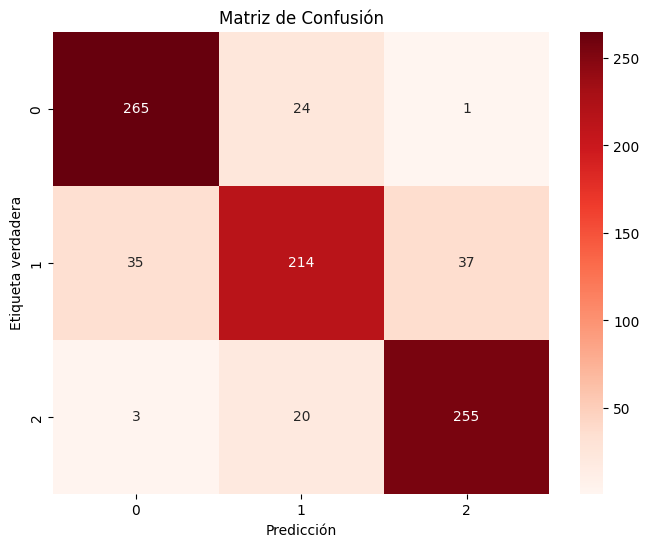

In [ ]:
y_pred = classifier.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)

# Puedes visualizar la matriz de confusión de manera más legible con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.xlabel('Predicción')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()

### Resultados

Se define una funcion que normaliza la matriz de confusión

In [ ]:
def normalize_confusion_matrix(conf_matrix):
    normalized_confusion = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]
    return normalized_confusion

#### Profundidad = 5

Clase rrl
presicion: 0.8431634821309935 +/- 0.008578720782891043
recall: 0.8441640378548897 +/- 0.004279072544558525
f1: 0.8436479368938095 +/- 0.005718721808240354
Clase EB
presicion: 0.7805039379397986 +/- 0.003949175069856241
recall: 0.7858108108108108 +/- 0.01137666097329916
f1: 0.7831289297816053 +/- 0.00753565576496233
Clase CEPH
presicion: 0.9378553627474424 +/- 0.0034644659238443425
recall: 0.9303333333333332 +/- 0.0035590260840104382
f1: 0.9340693594171914 +/- 0.0017806218441341402


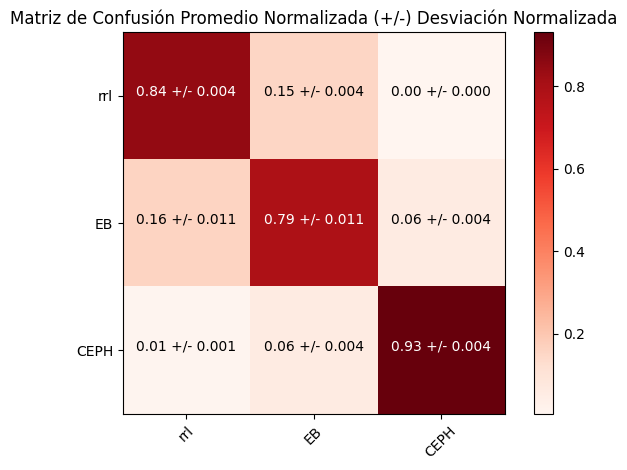

In [ ]:
conf_matrix = []

presicion1 = []
recall1 = []
f1_score1 = []

presicion2 = []
recall2 = []
f1_score2 = []

presicion3 = []
recall3 = []
f1_score3 = []

for j in range(5):
  # crear el clasificador
  #classifier = RandomForestClassifier(n_estimators=100)
  classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_depth = 5)
  # Entrenar el modelo usando el conjunto de entranamiento
  classifier.fit(X_train_scaled, y_train)

  y_pred = classifier.predict(X_test_scaled)

  # predicción en el conjunto de prueba
  y_pred_test = classifier.predict(X_test_scaled)
  y_pred_train = classifier.predict(X_train_scaled)

  # Metricas:
  a = precision_score(y_test, y_pred_test, average=None)
  r = recall_score(y_test, y_pred_test, average=None)
  f1 = f1_score(y_test, y_pred_test, average=None)

  presicion1.append(a[0])
  recall1.append(r[0])
  f1_score1.append(f1[0])

  presicion2.append(a[1])
  recall2.append(r[1])
  f1_score2.append(f1[1])

  presicion3.append(a[2])
  recall3.append(r[2])
  f1_score3.append(f1[2])


  y_pred = classifier.predict(X_test_scaled)
  cm = confusion_matrix(y_test, y_pred)
  conf_matrix.append(cm)

# Promedio y desv de metricas:

print("Clase rrl")
print(f"presicion: {np.mean(presicion1)} +/- {np.std(presicion1)}")
print(f"recall: {np.mean(recall1)} +/- {np.std(recall1)}")
print(f"f1: {np.mean(f1_score1)} +/- {np.std(f1_score1)}")

print("Clase EB")
print(f"presicion: {np.mean(presicion2)} +/- {np.std(presicion2)}")
print(f"recall: {np.mean(recall2)} +/- {np.std(recall2)}")
print(f"f1: {np.mean(f1_score2)} +/- {np.std(f1_score2)}")

print("Clase CEPH")
print(f"presicion: {np.mean(presicion3)} +/- {np.std(presicion3)}")
print(f"recall: {np.mean(recall3)} +/- {np.std(recall3)}")
print(f"f1: {np.mean(f1_score3)} +/- {np.std(f1_score3)}")


#Define las etiquetas de las clases
class_labels = ["rrl", "EB", "CEPH"]

prom_conf = np.mean(conf_matrix, axis = 0)
desv_conf = np.std(conf_matrix, axis = 0)


# Normaliza la matriz de confusión promedio
normalized_prom_conf = normalize_confusion_matrix(prom_conf)

# Calcula la matriz de desviación estándar normalizada
normalized_desv_conf = desv_conf / prom_conf.sum(axis=1)[:, np.newaxis]

# Prepara la matriz de texto que incluye tanto el valor normalizado como la desviación estándar normalizada
combined_normalized_confusion = np.array([[
    f"{normalized_prom_conf[i, j]:.2f} +/- {normalized_desv_conf[i, j]:.3f}"
    for j in range(normalized_prom_conf.shape[1])
] for i in range(normalized_prom_conf.shape[0])])

# Muestra la matriz de confusión normalizada con desviación estándar normalizada
plt.imshow(normalized_prom_conf, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Matriz de Confusión Promedio Normalizada (+/-) Desviación Normalizada')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Anota los valores normalizados con desviación estándar normalizada en la matriz de confusión
for i, j in itertools.product(range(normalized_prom_conf.shape[0]), range(normalized_prom_conf.shape[1])):
    plt.text(j, i, combined_normalized_confusion[i, j],
             horizontalalignment="center",
             color="white" if normalized_prom_conf[i, j] > 0.5 else "black")

# Muestra el gráfico
plt.tight_layout()
plt.show()

#### Profundidad = 10

Clase rrl
presicion: 0.8837747708440308 +/- 0.002581526798719033
recall: 0.8586750788643533 +/- 0.003811686427001419
f1: 0.871037502088946 +/- 0.0022355594773033
Clase EB
presicion: 0.8161004337525674 +/- 0.0038982123454143146
recall: 0.8439189189189188 +/- 0.003939832361381968
f1: 0.829762924064784 +/- 0.002007432921235411
Clase CEPH
presicion: 0.9484845059152391 +/- 0.0022962933684695934
recall: 0.945 +/- 0.002981423969999739
f1: 0.9467347098675418 +/- 0.001730858811952366


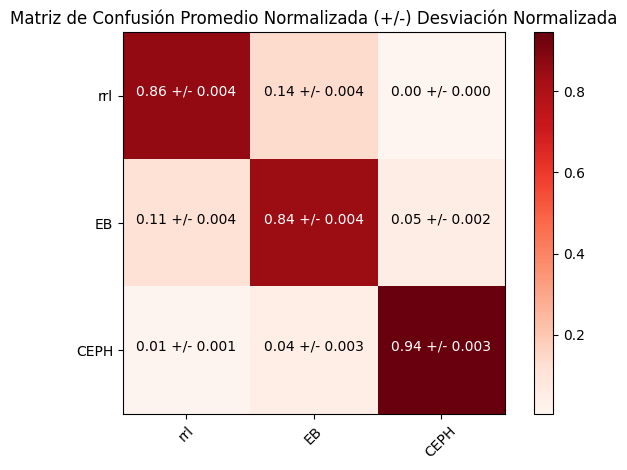

In [ ]:
conf_matrix = []

presicion1 = []
recall1 = []
f1_score1 = []

presicion2 = []
recall2 = []
f1_score2 = []

presicion3 = []
recall3 = []
f1_score3 = []

for j in range(5):
  # crear el clasificador
  #classifier = RandomForestClassifier(n_estimators=100)
  classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_depth = 10)
  # Entrenar el modelo usando el conjunto de entranamiento
  classifier.fit(X_train_scaled, y_train)

  y_pred = classifier.predict(X_test_scaled)

  # predicción en el conjunto de prueba
  y_pred_test = classifier.predict(X_test_scaled)
  y_pred_train = classifier.predict(X_train_scaled)

  # Metricas:
  a = precision_score(y_test, y_pred_test, average=None)
  r = recall_score(y_test, y_pred_test, average=None)
  f1 = f1_score(y_test, y_pred_test, average=None)

  presicion1.append(a[0])
  recall1.append(r[0])
  f1_score1.append(f1[0])

  presicion2.append(a[1])
  recall2.append(r[1])
  f1_score2.append(f1[1])

  presicion3.append(a[2])
  recall3.append(r[2])
  f1_score3.append(f1[2])


  y_pred = classifier.predict(X_test_scaled)
  cm = confusion_matrix(y_test, y_pred)
  conf_matrix.append(cm)

# Promedio y desv de metricas:

print("Clase rrl")
print(f"presicion: {np.mean(presicion1)} +/- {np.std(presicion1)}")
print(f"recall: {np.mean(recall1)} +/- {np.std(recall1)}")
print(f"f1: {np.mean(f1_score1)} +/- {np.std(f1_score1)}")

print("Clase EB")
print(f"presicion: {np.mean(presicion2)} +/- {np.std(presicion2)}")
print(f"recall: {np.mean(recall2)} +/- {np.std(recall2)}")
print(f"f1: {np.mean(f1_score2)} +/- {np.std(f1_score2)}")

print("Clase CEPH")
print(f"presicion: {np.mean(presicion3)} +/- {np.std(presicion3)}")
print(f"recall: {np.mean(recall3)} +/- {np.std(recall3)}")
print(f"f1: {np.mean(f1_score3)} +/- {np.std(f1_score3)}")


#Define las etiquetas de las clases
class_labels = ["rrl", "EB", "CEPH"]

prom_conf = np.mean(conf_matrix, axis = 0)
desv_conf = np.std(conf_matrix, axis = 0)

# Normaliza la matriz de confusión promedio
normalized_prom_conf = normalize_confusion_matrix(prom_conf)

# Calcula la matriz de desviación estándar normalizada
normalized_desv_conf = desv_conf / prom_conf.sum(axis=1)[:, np.newaxis]

# Prepara la matriz de texto que incluye tanto el valor normalizado como la desviación estándar normalizada
combined_normalized_confusion = np.array([[
    f"{normalized_prom_conf[i, j]:.2f} +/- {normalized_desv_conf[i, j]:.3f}"
    for j in range(normalized_prom_conf.shape[1])
] for i in range(normalized_prom_conf.shape[0])])

# Muestra la matriz de confusión normalizada con desviación estándar normalizada
plt.imshow(normalized_prom_conf, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Matriz de Confusión Promedio Normalizada (+/-) Desviación Normalizada')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Anota los valores normalizados con desviación estándar normalizada en la matriz de confusión
for i, j in itertools.product(range(normalized_prom_conf.shape[0]), range(normalized_prom_conf.shape[1])):
    plt.text(j, i, combined_normalized_confusion[i, j],
             horizontalalignment="center",
             color="white" if normalized_prom_conf[i, j] > 0.5 else "black")

# Muestra el gráfico
plt.tight_layout()
plt.show()

#### Profundidad = 20

Clase rrl
presicion: 0.887018740394403 +/- 0.004607473095514719
recall: 0.8593059936908517 +/- 0.0030584730961617022
f1: 0.8729400743571445 +/- 0.0035965133306441535
Clase EB
presicion: 0.8176548408171515 +/- 0.004780060386529963
recall: 0.8513513513513512 +/- 0.005233761278658661
f1: 0.8341601845588226 +/- 0.004768118234274891
Clase CEPH
presicion: 0.9509784795880607 +/- 0.003898825632668575
recall: 0.9436666666666668 +/- 0.0028674417556808565
f1: 0.9472997251641677 +/- 0.0018487818047983632


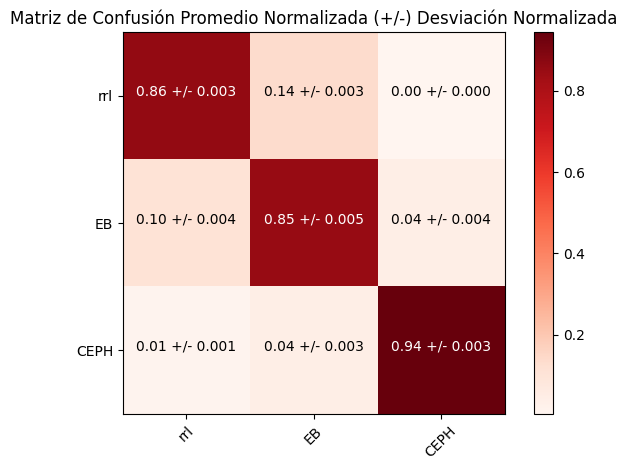

In [ ]:
conf_matrix = []

presicion1 = []
recall1 = []
f1_score1 = []

presicion2 = []
recall2 = []
f1_score2 = []

presicion3 = []
recall3 = []
f1_score3 = []

for j in range(5):
  # crear el clasificador
  #classifier = RandomForestClassifier(n_estimators=100)
  classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_depth = 20)
  # Entrenar el modelo usando el conjunto de entranamiento
  classifier.fit(X_train_scaled, y_train)

  y_pred = classifier.predict(X_test_scaled)

  # predicción en el conjunto de prueba
  y_pred_test = classifier.predict(X_test_scaled)
  y_pred_train = classifier.predict(X_train_scaled)

  # Metricas:
  a = precision_score(y_test, y_pred_test, average=None)
  r = recall_score(y_test, y_pred_test, average=None)
  f1 = f1_score(y_test, y_pred_test, average=None)

  presicion1.append(a[0])
  recall1.append(r[0])
  f1_score1.append(f1[0])

  presicion2.append(a[1])
  recall2.append(r[1])
  f1_score2.append(f1[1])

  presicion3.append(a[2])
  recall3.append(r[2])
  f1_score3.append(f1[2])


  y_pred = classifier.predict(X_test_scaled)
  cm = confusion_matrix(y_test, y_pred)
  conf_matrix.append(cm)

# Promedio y desv de metricas:

print("Clase rrl")
print(f"presicion: {np.mean(presicion1)} +/- {np.std(presicion1)}")
print(f"recall: {np.mean(recall1)} +/- {np.std(recall1)}")
print(f"f1: {np.mean(f1_score1)} +/- {np.std(f1_score1)}")

print("Clase EB")
print(f"presicion: {np.mean(presicion2)} +/- {np.std(presicion2)}")
print(f"recall: {np.mean(recall2)} +/- {np.std(recall2)}")
print(f"f1: {np.mean(f1_score2)} +/- {np.std(f1_score2)}")

print("Clase CEPH")
print(f"presicion: {np.mean(presicion3)} +/- {np.std(presicion3)}")
print(f"recall: {np.mean(recall3)} +/- {np.std(recall3)}")
print(f"f1: {np.mean(f1_score3)} +/- {np.std(f1_score3)}")


#Define las etiquetas de las clases
class_labels = ["rrl", "EB", "CEPH"]

prom_conf = np.mean(conf_matrix, axis = 0)
desv_conf = np.std(conf_matrix, axis = 0)


# Normaliza la matriz de confusión promedio
normalized_prom_conf = normalize_confusion_matrix(prom_conf)

# Calcula la matriz de desviación estándar normalizada
normalized_desv_conf = desv_conf / prom_conf.sum(axis=1)[:, np.newaxis]

# Prepara la matriz de texto que incluye tanto el valor normalizado como la desviación estándar normalizada
combined_normalized_confusion = np.array([[
    f"{normalized_prom_conf[i, j]:.2f} +/- {normalized_desv_conf[i, j]:.3f}"
    for j in range(normalized_prom_conf.shape[1])
] for i in range(normalized_prom_conf.shape[0])])

# Muestra la matriz de confusión normalizada con desviación estándar normalizada
plt.imshow(normalized_prom_conf, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Matriz de Confusión Promedio Normalizada (+/-) Desviación Normalizada')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Anota los valores normalizados con desviación estándar normalizada en la matriz de confusión
for i, j in itertools.product(range(normalized_prom_conf.shape[0]), range(normalized_prom_conf.shape[1])):
    plt.text(j, i, combined_normalized_confusion[i, j],
             horizontalalignment="center",
             color="white" if normalized_prom_conf[i, j] > 0.5 else "black")

# Muestra el gráfico
plt.tight_layout()
plt.show()

## Curva de aprendizaje

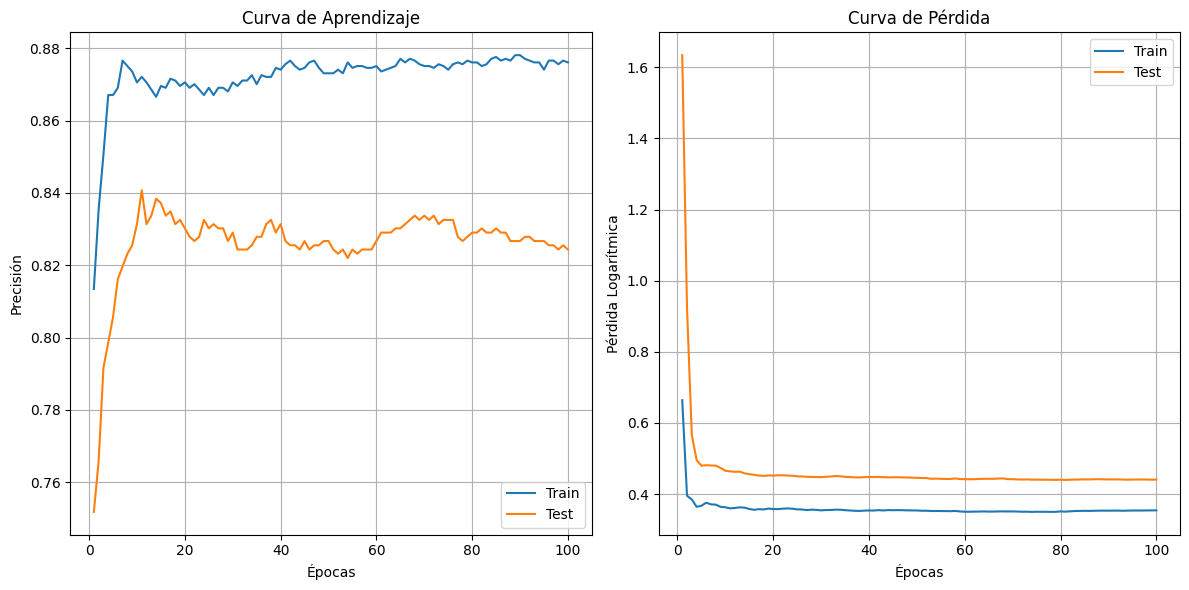

In [ ]:
from sklearn.metrics import accuracy_score, log_loss

# Profundidad máxima constante
max_depth = 5

# Número de épocas (cambiar según sea necesario)
n_epochs = 100

train_scores_depth = []
test_scores_depth = []
train_losses_depth = []
test_losses_depth = []

for epoch in range(n_epochs):
    # Crear el clasificador con la profundidad máxima constante
    classifier = RandomForestClassifier(n_estimators=epoch + 1, criterion='entropy', max_depth=max_depth, random_state=42)
    classifier.fit(X_train_scaled, y_train)

    # Predicciones y puntuaciones
    y_pred_train = classifier.predict(X_train_scaled)
    y_pred_test = classifier.predict(X_test_scaled)
    y_pred_train_prob = classifier.predict_proba(X_train_scaled)
    y_pred_test_prob = classifier.predict_proba(X_test_scaled)

    # Precisión y pérdida
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    train_loss = log_loss(y_train, y_pred_train_prob)
    test_loss = log_loss(y_test, y_pred_test_prob)

    train_scores_depth.append(train_accuracy)
    test_scores_depth.append(test_accuracy)
    train_losses_depth.append(train_loss)
    test_losses_depth.append(test_loss)


import matplotlib.pyplot as plt

# Graficar la curva de aprendizaje en función de las épocas
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Curva de Aprendizaje")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.grid()

plt.plot(range(1, n_epochs + 1), train_scores_depth, '-', label="Train")
plt.plot(range(1, n_epochs + 1), test_scores_depth, '-', label="Test")

plt.legend(loc="best")

# Graficar la curva de pérdida en función de las épocas
plt.subplot(1, 2, 2)
plt.title("Curva de Pérdida")
plt.xlabel("Épocas")
plt.ylabel("Pérdida Logarítmica")
plt.grid()

plt.plot(range(1, n_epochs + 1), train_losses_depth, '-', label="Train")
plt.plot(range(1, n_epochs + 1), test_losses_depth, '-', label="Test")

plt.legend(loc="best")

plt.tight_layout()
plt.show()


### Importancia de caracteristicas

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# crear el clasificador
# classifier = RandomForestClassifier(n_estimators=100)
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_depth = 15, random_state = 42)

# Entrenar el modelo usando el conjunto de entranamiento
classifier.fit(X_train_scaled, y_train)

#Obtén las importancias de las características y las etiquetas de las características
feature_importances = classifier.feature_importances_
feature_labels = [f"Feature {i}" for i in range(len(feature_importances))]

#Crea una lista de tuplas con etiquetas de características e importancias
feature_importance_tuples = list(zip(feature_labels, feature_importances))

#Ordena la lista en función de las importancias de las características (de mayor a menor)
feature_importance_tuples.sort(key=lambda x: x[1], reverse=True)

#Muestra la lista ordenada
for feature, importance in feature_importance_tuples:
    print(f"{feature}: {importance}")

from sklearn.feature_selection import SelectFromModel

#Selecciona las características con importancia por encima del umbral
feature_selector = SelectFromModel(classifier, threshold=0.02)
feature_selector.fit(X_train, y_train)

#Transforma los conjuntos de entrenamiento y prueba
X_train_selected = feature_selector.transform(X_train)
X_test_selected = feature_selector.transform(X_test)

modelo_seleccionado = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_depth = 15, random_state = 42)

modelo_seleccionado.fit(X_train_selected, y_train)

# predicción en el conjunto de prueba
y_pred_test = modelo_seleccionado.predict(X_test_selected)
y_pred_train = modelo_seleccionado.predict(X_train_selected)

# Calcular la precisión del modelo
print("Precisión test:", accuracy_score(y_test, y_pred_test))
print("Precisión train:", accuracy_score(y_train, y_pred_train))


Feature 62: 0.07228832303251846
Feature 107: 0.06234024196131139
Feature 68: 0.05458711563061922
Feature 94: 0.053090715038065485
Feature 101: 0.051349980613103856
Feature 88: 0.04537364207190002
Feature 98: 0.03863455671109683
Feature 75: 0.03808238222949227
Feature 39: 0.03406484524444949
Feature 55: 0.033874518080009686
Feature 102: 0.030422181666319315
Feature 81: 0.029693376400861587
Feature 8: 0.028151433693985636
Feature 3: 0.023319839585335934
Feature 71: 0.01932161202040056
Feature 83: 0.012062532658930853
Feature 45: 0.011849117886401788
Feature 24: 0.011203558886205103
Feature 54: 0.009574522393484849
Feature 42: 0.009393070031594617
Feature 76: 0.00918430505427096
Feature 85: 0.008713012077750167
Feature 96: 0.008529710101350603
Feature 97: 0.00844070125628117
Feature 72: 0.008431966885789337
Feature 95: 0.007735931337309396
Feature 40: 0.00770161737423848
Feature 44: 0.007571378591690012
Feature 69: 0.006719973801951016
Feature 43: 0.00655107881500516
Feature 113: 0.006312

SelectFromModel(estimator=RandomForestClassifier(criterion='entropy',
                                                 max_depth=15,
                                                 random_state=42),
                threshold=0.02)